<a href="https://colab.research.google.com/github/jinnykj/PokemonGO-Review-dataset-analysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_%EA%B8%B0%EB%A7%90_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files


In [2]:
uploaded = files.upload()

Saving pokemon_reviews.xlsx to pokemon_reviews.xlsx


In [3]:
data = pd.read_excel('pokemon_reviews.xlsx')

In [4]:
data.head()

,userName,content,score,reviewCreatedVersion
0,Neymar Jr,The most useless game ever. Spent so much mone...,1,0.29.0
1,A Google user,So many bugs and issues and the gameplay is qu...,1,0.29.0
2,A Google user,This game would be great if they could get the...,3,0.29.0
3,A Google user,"Had to uninstall game do to a bad update, now ...",4,0.29.0
4,A Google user,Will not recognize my account. Changed the pas...,1,0.29.0


In [5]:
df = data.drop(columns='userName')

In [6]:
df.reset_index(inplace=True)

In [7]:
df.dropna()

,index,content,score,reviewCreatedVersion
0,0,The most useless game ever. Spent so much mone...,1,0.29.0
1,1,So many bugs and issues and the gameplay is qu...,1,0.29.0
2,2,This game would be great if they could get the...,3,0.29.0
3,3,"Had to uninstall game do to a bad update, now ...",4,0.29.0
4,4,Will not recognize my account. Changed the pas...,1,0.29.0
...,...,...,...,...
108539,108539,Logan Brierley 9,3,0.263.0
108540,108540,Got me outside,5,0.263.0
108541,108541,Still no fix for galaxy fold 4. Unable to conn...,1,0.263.1
108542,108542,still can't connect to nintendo switch for my ...,1,0.263.1


In [15]:
averagescore = df.groupby('reviewCreatedVersion')['score'].mean().reset_index()

In [16]:
averagescore.drop(index=range(173, 223))

,reviewCreatedVersion,score
0,0.101.1,2.923077
1,0.103.3,3.350000
2,0.103.5,4.000000
3,0.105.0,3.322581
4,0.105.1,3.468750
...,...,...
168,0.261.0,3.221461
169,0.261.1,3.219963
170,0.261.2,3.500000
171,0.261.3,3.311801


from matplotlib import pyplot as plt
_df_7['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

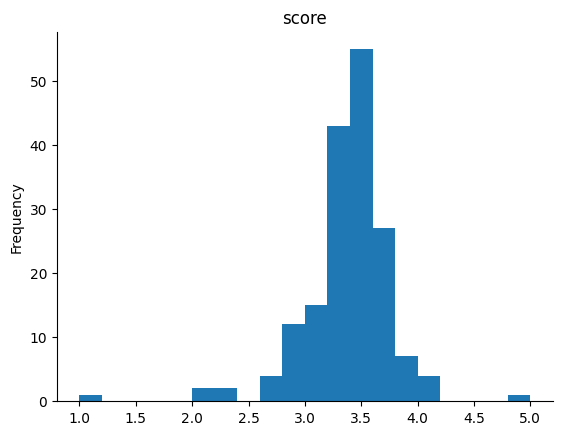

In [23]:
_df_7['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
reviewcount = df.groupby('reviewCreatedVersion')['content'].count().reset_index()

In [22]:
reviewcount.drop(index=range(173, 223))

,reviewCreatedVersion,content
0,0.101.1,13
1,0.103.3,20
2,0.103.5,6
3,0.105.0,31
4,0.105.1,32
...,...,...
168,0.261.0,438
169,0.261.1,541
170,0.261.2,380
171,0.261.3,805


from matplotlib import pyplot as plt
_df_9['content'].plot(kind='hist', bins=20, title='content')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['content'].plot(kind='line', figsize=(8, 4), title='content')
plt.gca().spines[['top', 'right']].set_visible(False)